# GEC Data Science Program
## Level 2, Lab 1

### Intro to project

1. Understanding the Amazon from Space


https://www.kaggle.com/c/planet-understanding-the-amazon-from-space

2. Google Cloud & YouTube-8M Video Understanding Challenge

https://www.kaggle.com/c/youtube8m

### Environment Setup

#### Software and tools

- Anaconda https://www.anaconda.com/download/
- Tensorflow https://www.tensorflow.org/
- Keras https://keras.io/

#### Mac/Linux Install (python 2.7)
TensorFlow
```sh
export TF_BINARY_URL=https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-0.12.1-py2-none-any.whl
sudo pip install --upgrade $TF_BINARY_URL --ignore-installed
```
Keras
```sh
sudo pip install keras; python -c "import keras; print keras.__version__"; sudo pip install --upgrade keras
```

In [1]:
from __future__ import division

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'0.12.1'

In [4]:
import keras

Using TensorFlow backend.


In [5]:
keras.__version__

'2.0.8'

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

## Load Data

#### Data

For this lab we use this data:
https://www.kaggle.com/c/digit-recognizer

In [7]:
d=pd.read_csv("train.csv")

In [17]:
d.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

In [18]:
d.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

### Explore data

Let's look at the first image

In [19]:
d.values[0]

array([  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### Q: Can we plot the digits?

In [20]:
L = d.values[3][0]

In [21]:
L

4

In [22]:
img_vector = d.values[3][1:]

In [23]:
img=img_vector.reshape((28,28))

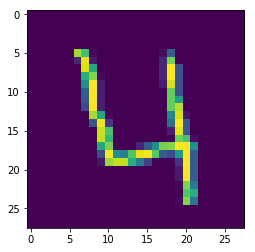

In [25]:
plt.imshow(img);

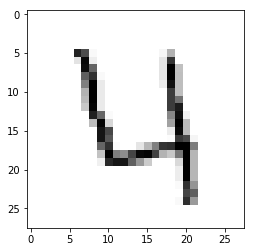

In [26]:
plt.imshow(img, cmap=plt.cm.binary);

#### Q: How can we rotate the image 90 degrees?
Hint: use np.rot90

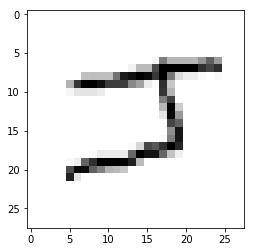

In [27]:
plt.imshow(np.rot90(img), cmap=plt.cm.binary) 

#### Q: How can we flip the image?

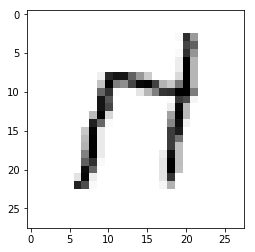

In [28]:
#flip upside-down
plt.imshow(img[::-1], cmap=plt.cm.binary) 

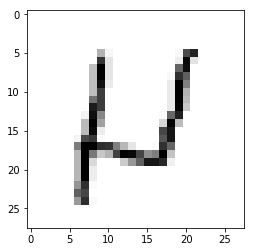

In [29]:
#flip left-right
plt.imshow(img[:,::-1], cmap=plt.cm.binary) 

#### Q: Plot some random images:

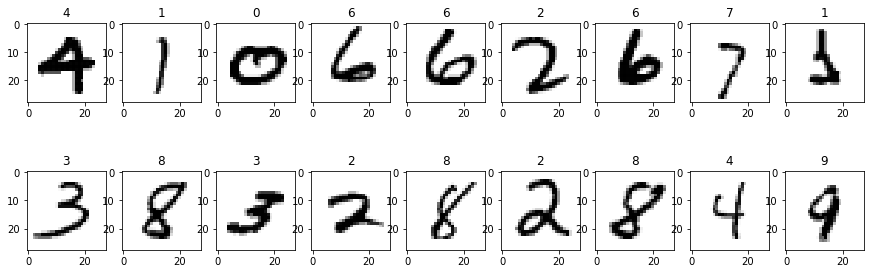

In [32]:
plt.figure(figsize=(15,5))
for i,idx in enumerate(np.random.randint(1,high=len(d),size=18)):
    L = d.values[idx][0]
    img_vector = d.values[idx][1:]
    img=img_vector.reshape((28,28))
    plt.subplot(2,9,i+1)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title(str(L))

### Q: What's the distribution of digits?

(array([ 4132.,  4684.,  4177.,  4351.,  4072.,  3795.,  4137.,  4401.,
         4063.,  4188.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

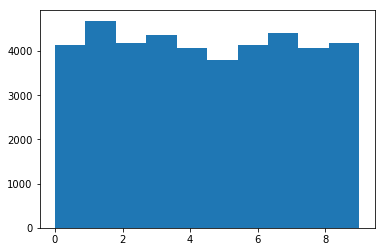

In [33]:
plt.hist(d.label)

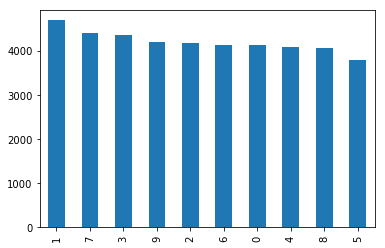

In [34]:
d.label.value_counts().plot.bar()

#### Create X=features, y=labels.

In [8]:
X=d.values[:,1:]

In [9]:
y=d.values[:,0]

### Q: Can we visualize the Principal Components?

In [10]:
from sklearn.decomposition import PCA

In [11]:
import sklearn

In [12]:
pca=PCA()

In [13]:
Xpca=pca.fit_transform(X)

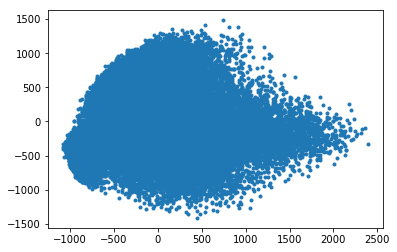

In [48]:
plt.plot(Xpca[:,0],Xpca[:,1],'.')

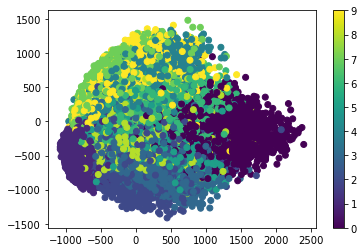

In [50]:
plt.scatter(Xpca[:,0],Xpca[:,1],c=y)
plt.colorbar()

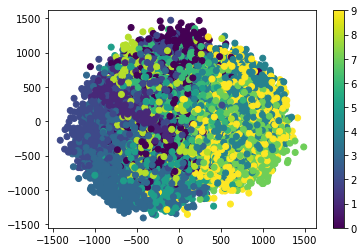

In [51]:
plt.scatter(Xpca[:,1],Xpca[:,2],c=y);
plt.colorbar();

### Q: How many Principal Components are important? or
### Q: How much variation is explained by each Principal Component?

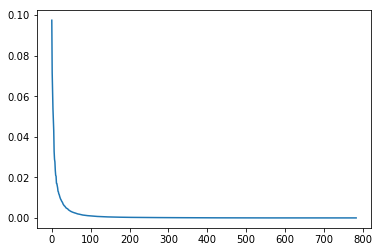

In [44]:
plt.plot(pca.explained_variance_ratio_)

In [45]:
np.where(pca.explained_variance_ratio_>0.005)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),)

Let's take most important PCs.

In [14]:
Xpca_r = Xpca[:,:36]

### Q: What if we turn Principal Components into images?

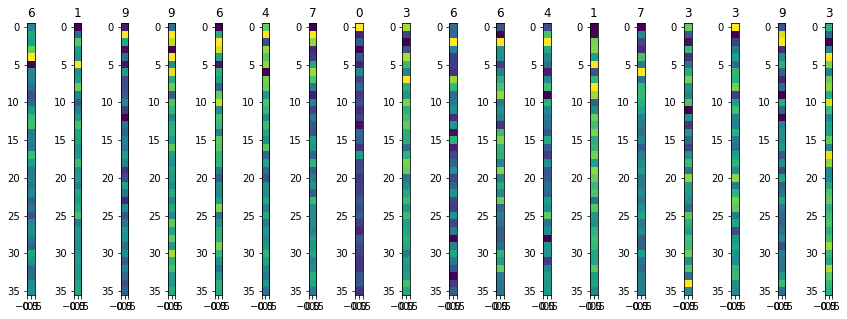

In [47]:
plt.figure(figsize=(15,5))
for i,idx in enumerate(np.random.randint(1,high=len(d),size=18)):
    L = y[idx]
    img_vector = Xpca_r[idx]
    img=img_vector.reshape((36,1))
    plt.subplot(1,18,i+1)
    plt.imshow(img)
    plt.title(str(L))

### Q: Can we use another transformation other than PCA?

http://scikit-learn.org/stable/modules/manifold.html

In [ ]:
from sklearn import manifold
from matplotlib.pyplot import cm

lle = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2)

In [ ]:
Xlle = lle.fit_transform(X) #warning: takes a long time to complete

In [ ]:
plt.scatter(Xlle[:,0],Xlle[:,1],c=y, cmap=cm.RdYlBu); 
plt.colorbar();

### Let's create a simple classifier -- Nearest Neighbor

In [19]:
from sklearn import model_selection

In [53]:
!pip install tqdm

In [20]:
from tqdm import tqdm

In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xpca_r, y, test_size=0.33)

In [22]:
def find_nearest_neighbor(x, D):
    xr=x.reshape((1,len(x))).repeat(len(D), axis=0)
    delt=D-xr
    sq_dist=np.sum(delt*delt, axis=1)
    return np.argmin(sq_dist)

Let's test the first data point from test set:

Q: What's the index of the nearest neighbor in training data to the first test data point?

In [57]:
X_test[0]

array([ 206.70829608,  606.68162213, -567.25603969,  398.95414163,
        306.11841632,   78.48841816, -731.80479963,    1.24306604,
        552.71317424, -416.47510293, -214.42274549,   88.22641319,
       -288.97941773,  326.00752195,   -2.06699988, -145.84943831,
        220.9758033 ,  -82.74908985,  -80.5857826 , -232.53515166,
       -113.35079271,  168.9857219 ,   25.9407274 , -140.64199155,
       -270.26356156, -250.35038099,  -61.98075365,   28.99096382,
         52.71715775,  180.65952499,  172.0850564 ,  228.82200935,
          2.2011574 , -134.58113975,  -37.15125374, -262.46716119])

In [60]:
X_train

array([[ 577.63134441,  -55.45334284, -320.60228728, ...,   13.06536501,
         -96.40679704,  193.68635579],
       [ 380.37214259, -700.78927131,  506.91935047, ..., -109.47812086,
         -61.55369508,  249.00983684],
       [-144.15312082, -752.27525391,  283.64072146, ..., -214.90283177,
          93.12476838, -125.52996043],
       ..., 
       [ 124.59718694,  133.90226179,  983.45886953, ...,  -77.30815201,
        -106.91571074, -215.43585252],
       [ -72.3604868 , -319.35047331,  751.04816929, ...,  146.85389314,
         -38.95645753,   60.42235792],
       [-858.19878916, -525.4802493 ,   39.95796939, ...,   16.75989719,
         -36.41200999,  -28.25391745]])

In [71]:
#not an efficient way:
# d=np.inf
# for i in range(len(X_train)):
#     d=min(d,np.sqrt(sum((X_test[0]-X_train[i])**2)))

In [66]:
np.sqrt(sum((X_test[0]-X_train[10])**2))

2169.0407751240041

In [67]:
np.sqrt(sum((X_test[0]-X_train[50])**2))

2699.6462393233874

In [68]:
np.sqrt(sum((X_test[0]-X_train[14831])**2))

676.14162569747646

In [58]:
idx=find_nearest_neighbor(X_test[0],X_train)
idx

14831

Q: What's the nearest neighbor label?

In [59]:
#this is our prediction
y_train[idx]

4

Is the prediction correct?

In [69]:
y_test[0]

4

Q: Do the same for all test data:

In [23]:
def predict_Labels(X, D, labels):
    r=[]
    for x in tqdm(X):
        idx = find_nearest_neighbor(x, D)
        predicted_label = labels[idx]
        r.append(predicted_label)
    return r

In [24]:
y_pred_ = predict_Labels(X_test, X_train, y_train)
y_pred = np.array(y_pred_)

100%|██████████| 13860/13860 [02:32<00:00, 90.90it/s]


In [ ]:
# #save y_pred
# with open("y_pred","w") as f:
#     y_pred.tofile(f)

In [26]:
# #load y_pred
# with open("y_pred","r") as f:
#     y_pred = np.fromfile(f, dtype=np.int64)

Let's check the first few predictions:

In [27]:
y_pred[:10]

array([8, 9, 6, 5, 7, 2, 7, 1, 5, 8])

In [28]:
y_test[:10]

array([8, 9, 6, 5, 7, 2, 7, 1, 5, 8])

Looks very good!
#### Q: What's the accuracy?

In [29]:
num_corrects = sum(y_pred==y_test)

In [30]:
num_corrects, len(y_test)

(13443, 13860)

In [31]:
num_corrects/len(y_test)

0.96991341991341995

### Q: What data points where incorrectly predicted? and why?

In [32]:
incorrects_idx = np.where(y_pred != y_test)

In [33]:
Xe = X_test[incorrects_idx]
ye = y_test[incorrects_idx]

In [34]:
y_pred_e = y_pred[incorrects_idx]

In [35]:
y_pred_e[:10]

array([9, 3, 8, 5, 3, 7, 2, 2, 8, 8])

In [36]:
ye[:10]

array([7, 8, 3, 3, 2, 4, 7, 3, 3, 3])

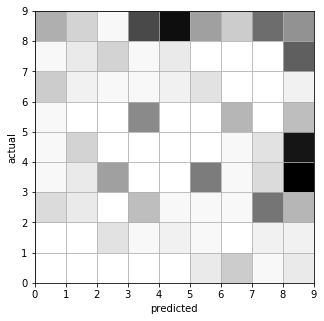

In [40]:
plt.figure(figsize=(5,5))
plt.hist2d(y_pred_e,ye,bins=9,cmap=plt.cm.gray_r);
plt.grid('on');
plt.xlabel("predicted");
plt.ylabel("actual");

#### Q: most errors belong to which number?

9

Unfortunately we can't see the images because we used PCA and randomly splitted data into train and test sets so we lost the original data points.
#### Q: how can we avoid this problem?

### Q: How can we provide a confidence measure for the predictions?

### Q: Use another algorithm (e.g. SVM, Random Forest) to predict digits. Will acuracy increase?